In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import datetime

In [107]:
def calc_nino(SST_data):
    
    # Open netcdf file
    ds = xr.open_dataset(SST_data, decode_times=False)

    # Fix Dates to Match File
    reference_date = pd.to_datetime("1850-01-01")
    start_date = reference_date + datetime.timedelta(days = float(ds.time[0]))
    ds['time'] = pd.date_range(start=start_date, periods=ds.sizes['time'], freq='MS')

    # Select Niño 3.4 region (5N-5S, 170W-120W)
    ds_nino34 = ds.sel(lat=slice(-5, 5), lon=slice(190, 240))

    # Calculate area-weighted mean SST
    weights = np.cos(np.deg2rad(ds_nino34.lat))
    weights.name = 'weights'
    ds_weighted = ds_nino34['SST'].weighted(weights)
    mean_sst = ds_weighted.mean(dim=['lat', 'lon'])
    ds_nino34 = mean_sst
    
    # Calculate monthly climatology and anomalies
    #climatology = mean_sst.groupby('time.month').mean()
    #anomalies = mean_sst.groupby('time.month') - climatology

    # Apply 5-month running mean and normalize
    #nino34 = anomalies.rolling(time=5, center=True).mean()
    #nino34 = nino34 / nino34.std()

    # Select Jul-Oct
    month_list = [True if month in [7,8,9,10] else False for month in ds['time.month']]
    ds_nino34 = ds_nino34.loc[{'time' : month_list}] 

    # Calculate temporal mean
    ds_nino34 = ds_nino34.groupby('time.year').mean()

    return ds_nino34

In [108]:
calc_nino('SST.nc').to_dataframe().T

year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
SST,299.909117,299.439198,300.754235,300.050932,300.22109,302.458675,300.284525,300.390919,300.644762,300.689389


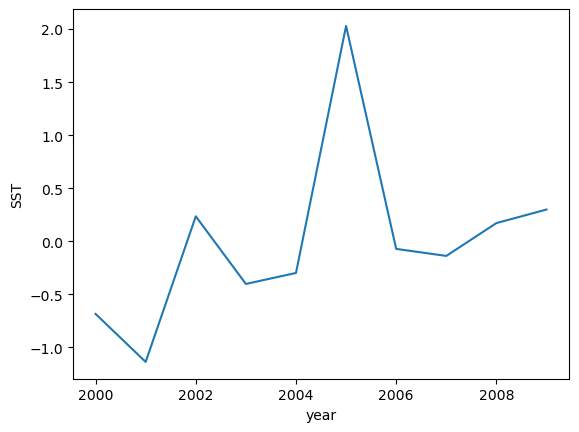

In [97]:
calc_nino('SST.nc').plot()